## Arewa DataScience Academy
## Arewa DataScience Academy
### Deep Learning Cohort 2.0

### WEEK 3 Solution

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

    For consistency, the dataset should have 1000 samples and a random_state=42.
    Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.


In [8]:
from sklearn.datasets import make_moons

MANUAL_SEED=42
X, y = make_moons(n_samples=1000,
                  noise=0.05,
                  random_state=MANUAL_SEED)

X[:10], y[:10]

(array([[-0.02137124,  0.40618608],
        [ 0.97670045, -0.45832306],
        [ 0.90405882, -0.37651952],
        [ 0.37736316, -0.39703717],
        [-0.84192557,  0.53058695],
        [ 0.58930337, -0.32137599],
        [ 0.29248724, -0.20696309],
        [-0.02637836,  0.44766267],
        [ 1.6201408 , -0.28758856],
        [ 0.68246733,  0.80712069]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [6]:
# Turn data into a DataFrame
import pandas as pd

df = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "y": y})
df.head(10)

,X1,X2,y
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0
5,0.589303,-0.321376,1
6,0.292487,-0.206963,1
7,-0.026378,0.447663,1
8,1.620141,-0.287589,1
9,0.682467,0.807121,0


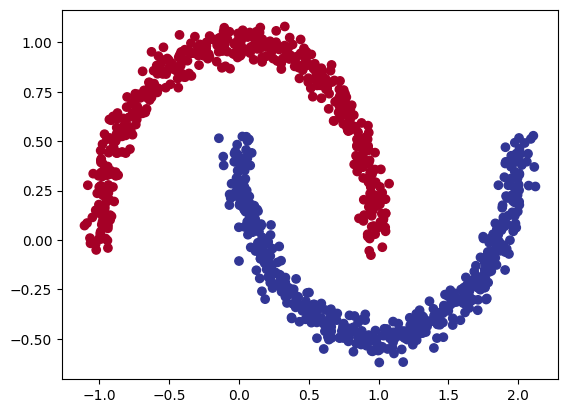

In [ ]:
# Visualize the data on a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
# Turn data into tensors
import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=MANUAL_SEED)

len(X_train),  len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

    Feel free to use any combination of PyTorch layers (linear and non-linear) you want.


In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [13]:
from torch import nn

class MoonModelV1(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=in_features, 
                                 out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, 
                                 out_features=hidden_units)
        self.layer_3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = MoonModelV1(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_1

MoonModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [14]:
loss_fn = nn.BCEWithLogitsLoss() 

optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1) 

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

    - To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
    - Train the model for long enough for it to reach over 96% accuracy.
    - The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.


In [ ]:
# logits (raw outputs of model)
print("Logits:")
print(model_1(X_train.to(device)[:10]).squeeze(), '\n')

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_1(X_train.to(device)[:10]).squeeze()), '\n')

print("Pred labels:")
print(torch.round(torch.sigmoid(model_1(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.2129, 0.0819, 0.0621, 0.0659, 0.1871, 0.0642, 0.2021, 0.1431, 0.1000,
        0.1122], grad_fn=<SqueezeBackward0>) 

Pred probs:
tensor([0.5530, 0.5205, 0.5155, 0.5165, 0.5466, 0.5160, 0.5503, 0.5357, 0.5250,
        0.5280], grad_fn=<SigmoidBackward0>) 

Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [16]:
# Let's calculate the accuracy
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) 
acc_fn

MulticlassAccuracy()

In [18]:


torch.manual_seed(RANDOM_SEED)

epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
# loss = compare model raw outputs to desired model outputs
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train.int()) #\

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation)
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval() 
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int()) 

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     


Epoch: 0 | Loss: 0.67 Acc: 0.50 | Test loss: 0.67 Test acc: 0.50
Epoch: 100 | Loss: 0.32 Acc: 0.86 | Test loss: 0.33 Test acc: 0.85
Epoch: 200 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 300 | Loss: 0.22 Acc: 0.90 | Test loss: 0.21 Test acc: 0.90
Epoch: 400 | Loss: 0.20 Acc: 0.91 | Test loss: 0.19 Test acc: 0.92
Epoch: 500 | Loss: 0.17 Acc: 0.92 | Test loss: 0.17 Test acc: 0.92
Epoch: 600 | Loss: 0.13 Acc: 0.94 | Test loss: 0.13 Test acc: 0.94
Epoch: 700 | Loss: 0.10 Acc: 0.96 | Test loss: 0.09 Test acc: 0.98
Epoch: 800 | Loss: 0.07 Acc: 0.98 | Test loss: 0.06 Test acc: 0.99
Epoch: 900 | Loss: 0.04 Acc: 0.99 | Test loss: 0.04 Test acc: 1.00


In [19]:


# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
     


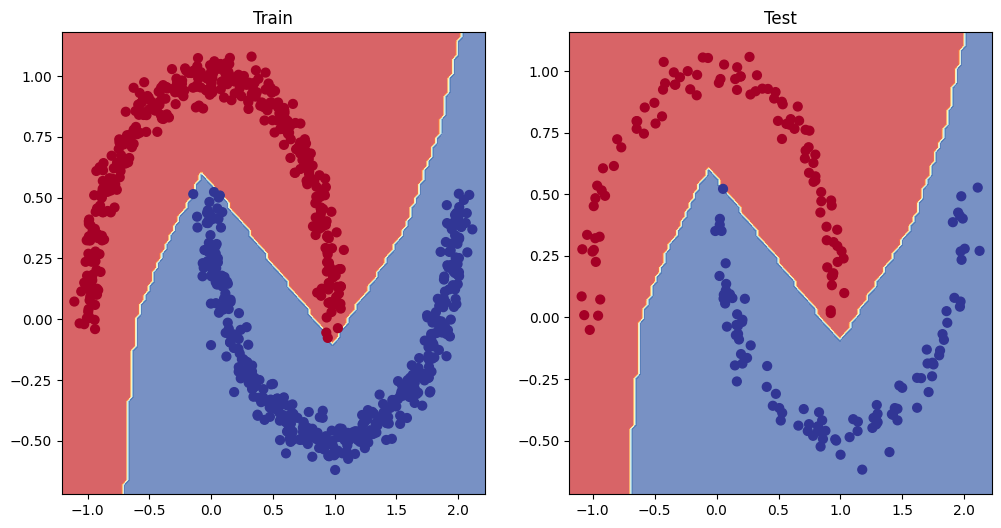

In [20]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

    Feel free to reference the ML cheatsheet website for the formula.


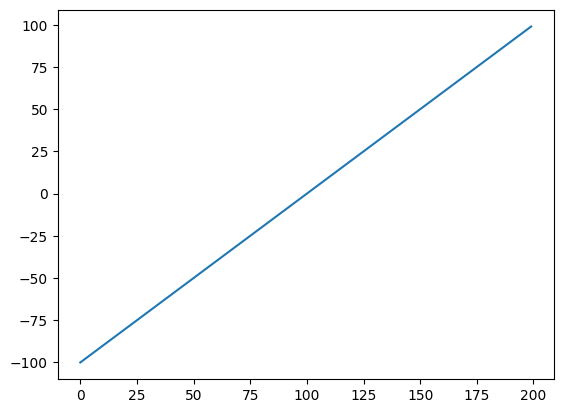

In [22]:

tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)

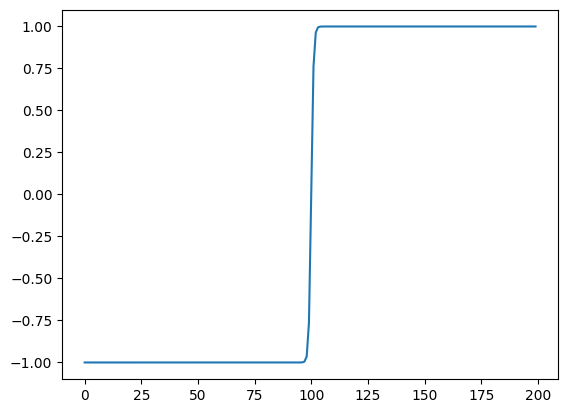

In [23]:
plt.plot(torch.tanh(tensor_A))

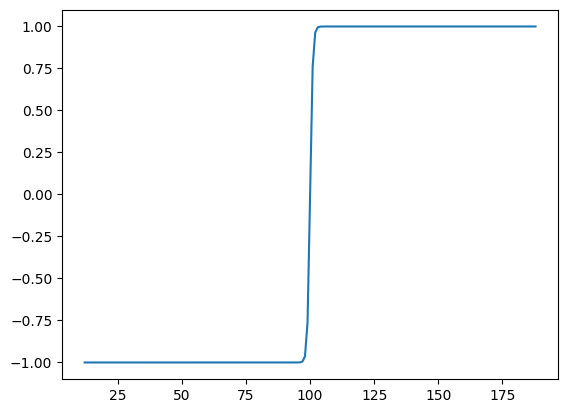

In [24]:
def tanh(x):
  # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

  - Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dat

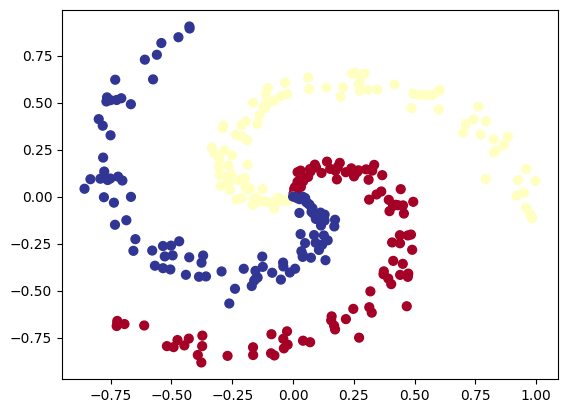

In [25]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [26]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [27]:
# Let's calculate the accuracy for when we fit our model
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [29]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_2 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [30]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
logits = model_2(X_train)[:10]
print(logits)

print("Pred probs:")
print(torch.softmax(logits, dim=1))

print("Pred labels:")
print(torch.softmax(model_2(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.3621, -0.2138, -0.2310],
        [-0.3614, -0.2079, -0.2221],
        [-0.3471, -0.2292, -0.2296],
        [-0.2831, -0.2908, -0.2104],
        [-0.2988, -0.2787, -0.2243],
        [-0.3317, -0.2429, -0.2223],
        [-0.3408, -0.2369, -0.2274],
        [-0.3587, -0.2284, -0.2479],
        [-0.3358, -0.2374, -0.2223],
        [-0.2822, -0.2918, -0.2104]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3030, 0.3515, 0.3455],
        [0.3016, 0.3517, 0.3467],
        [0.3077, 0.3462, 0.3461],
        [0.3260, 0.3235, 0.3506],
        [0.3228, 0.3294, 0.3478],
        [0.3117, 0.3406, 0.3477],
        [0.3096, 0.3435, 0.3468],
        [0.3071, 0.3498, 0.3431],
        [0.3102, 0.3423, 0.3475],
        [0.3263, 0.3232, 0.3506]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([1, 1, 1, 2, 2, 2, 2, 1, 2, 2])


In [31]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=0.02)

In [32]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_2.train()
  # 1. forward pass
  y_logits = model_2(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_2(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     


Epoch: 0 | Loss: 1.11 Acc: 0.15 | Test loss: 1.11 Test acc: 0.27
Epoch: 100 | Loss: 0.11 Acc: 0.98 | Test loss: 0.08 Test acc: 1.00
Epoch: 200 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 300 | Loss: 0.03 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 400 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 500 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 700 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


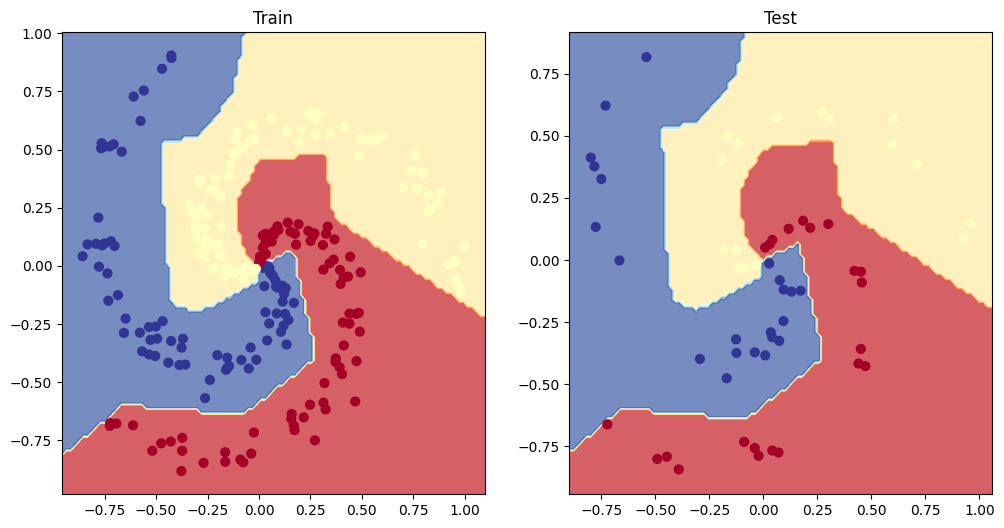

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)